In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score

In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

## Part 1

What is an optimization problem? 

- We aim to find the best state, according to some objective function. 
- An example of a state is the weights used in a machine learning model, such as a neural network
- State is represented by a one-dimensional vector 
- "Best" state is defined using the Cost Function/Fitness Function/Objective Function 
- Function takes in a State Array as Input and returns a Fitness Value as Output


We will make 3 steps to solve an optimization problem with mlrose:
 - 1) Define fitness function object
 - 2) Define an optimization problem object
 - 3) Select and run a randomized optimization algorithm

#### 1) Define Fitness Function Object

In [121]:
#fitness1 = mlrose.FourPeaks(t_pct=0.1)
#fitness2 = mlrose.MaxKColor(edges=edges)
#fitness3 = mlrose.FlipFlop()

import random

random.seed(42)
weights = []
values = []

for i in range(100):    
    weights.append(random.randint(1, 100))
    values.append(random.randint(1, 100))

    
#fitness4 = mlrose.Knapsack(weights=weights, values=values, max_weight_pct = 0.35)

fitness4 = mlrose.Knapsack(weights=weights, values=values, max_weight_pct = 0.35)

#### 2) Define an Optimization Problem Object

In [122]:
#this requires a LENGTH of Edges - we can tune this 

problem4 = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness4, maximize = True, max_val = 2)

In [123]:
problem4.length

100

#### 3) Select and Run Randomized Optimization Algorithm

##### Find Optimzal Parameters for RHC, SA, GA, Mimic for the Knap Sack Problem

##### Random Hill Climbing

restarts

In [124]:
restarts_list = np.arange(0, 11, 1)

restarts_probs = [.25, .50, .75, 1.0, 2.0]
problem_length = np.array(problem4.length)

restarts_list2 = np.dot(restarts_probs, problem_length)

restarts_list_full =  np.concatenate((restarts_list, restarts_list2))

for num in restarts_list_full:
    best_state, best_fitness = mlrose.random_hill_climb(problem=problem4, restarts = int(num),
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)
    #print(best_state)
    print("restarts:",num, "best_fitness:",best_fitness)


restarts: 0.0 best_fitness: 0.0
restarts: 1.0 best_fitness: 0.0
restarts: 2.0 best_fitness: 0.0
restarts: 3.0 best_fitness: 0.0
restarts: 4.0 best_fitness: 0.0
restarts: 5.0 best_fitness: 0.0
restarts: 6.0 best_fitness: 0.0
restarts: 7.0 best_fitness: 0.0
restarts: 8.0 best_fitness: 0.0
restarts: 9.0 best_fitness: 0.0
restarts: 10.0 best_fitness: 0.0
restarts: 25.0 best_fitness: 0.0
restarts: 50.0 best_fitness: 0.0
restarts: 75.0 best_fitness: 0.0
restarts: 100.0 best_fitness: 0.0
restarts: 200.0 best_fitness: 0.0


max_attempts

In [125]:
max_attempts_list = [10, 100, 1000, 10000, 100000]

for num in max_attempts_list:
    
    best_state, best_fitness = mlrose.random_hill_climb(problem=problem4, restarts = 1,
                                                   max_attempts = int(num), max_iters = 1000,
                                                   random_state = 42)
    #print(best_state)
    print(best_fitness)


0.0
0.0
0.0
0.0
0.0


max_iters

In [126]:
max_iters_list = [10, 100, 1000, 10000, 100000]

for num in max_iters_list:
    
    best_state, best_fitness = mlrose.random_hill_climb(problem=problem4, restarts = 1,
                                                   max_attempts = 10, max_iters = int(num),
                                                    random_state = 42)
    #print(best_state)
    print(best_fitness)


0.0
0.0
0.0
0.0
0.0


##### Simulated Annealing

schedule

In [127]:
scheduleG = mlrose.GeomDecay()
scheduleA = mlrose.ArithDecay()
scheduleE = mlrose.ExpDecay()

best_state, best_fitness = mlrose.simulated_annealing(problem=problem4, schedule = scheduleG,
                                               max_attempts = 10, max_iters = 1000,
                                                    random_state = 42)

#print(best_state)

print(best_fitness)

2239.0


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


In [128]:
best_state, best_fitness = mlrose.simulated_annealing(problem=problem4, schedule = scheduleA,
                                               max_attempts = 10, max_iters = 1000,
                                                    random_state = 42)

#print(best_state)

print(best_fitness)

2239.0


In [129]:
best_state, best_fitness = mlrose.simulated_annealing(problem=problem4, schedule = scheduleE,
                                               max_attempts = 10, max_iters = 1000,
                                                    random_state = 42)

#print(best_state)

print(best_fitness)

2239.0


Max Attempts

In [130]:
max_attempts_list = [10, 100, 1000, 10000, 100000]

for num in max_attempts_list:
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem4, schedule = scheduleG,
                                                   max_attempts = num, max_iters = 1000,
                                                        random_state = 42)

    #print(best_state)
    print(best_fitness)


2239.0
2239.0
2239.0
2239.0
2239.0


Max Iters

In [131]:
max_iters_list = [10, 100, 1000, 10000, 100000]

for num in max_iters_list:
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem4, schedule = scheduleG,
                                                   max_attempts = 10, max_iters = num,
                                                        random_state = 42)
    
    #print(best_state)
    print(best_fitness)


0.0
0.0
2239.0
2239.0
2239.0


##### Genetic Alg

In [132]:
best_state, best_fitness = mlrose.genetic_alg(problem=problem4, 
                                              pop_size = 200, mutation_prob = 0.1,
                                              max_attempts = 10, max_iters = 1000,
                                               random_state = 42)


print(best_fitness)

2700.0


pop_size

In [88]:
pop_size_list = [.10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0, 7.5, 10]
problem_length = problem4.length

for num in pop_size_list:
    size =  problem_length*num
    best_state, best_fitness = mlrose.genetic_alg(problem=problem4, 
                                                  pop_size = int(size), mutation_prob = 0.1,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42)

    print("pop_size:", size, " best_fitness:", best_fitness)


pop_size: 10.0  best_fitness: 2494.0
pop_size: 25.0  best_fitness: 2666.0
pop_size: 50.0  best_fitness: 2714.0
pop_size: 75.0  best_fitness: 2747.0
pop_size: 100.0  best_fitness: 2806.0
pop_size: 150.0  best_fitness: 2761.0
pop_size: 200.0  best_fitness: 2890.0
pop_size: 250.0  best_fitness: 2911.0
pop_size: 300.0  best_fitness: 2888.0
pop_size: 500.0  best_fitness: 2969.0
pop_size: 750.0  best_fitness: 2865.0
pop_size: 1000  best_fitness: 3003.0


In [138]:
pop_size_list = [.10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0, 7.5, 10]
problem_length = problem4.length

ga_dict1 = {
    'pop_size': [],
    'best_fitness':[],
    'curve':[]
}
for num in pop_size_list:
    size =  problem_length*num
    best_state, best_fitness,curve = mlrose.genetic_alg(problem=problem4, 
                                                  #pop_size = int(size), mutation_prob = 0.1,
                                                  pop_size = int(size), mutation_prob = 0.01,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42,curve=True)

    print("pop_size:", size, " best_fitness:", best_fitness)
    ga_dict1['pop_size'].append(size)
    ga_dict1['best_fitness'].append(best_fitness)
    ga_dict1['curve'].append(curve)
    


pop_size: 10.0  best_fitness: 0.0
pop_size: 25.0  best_fitness: 3050.0
pop_size: 50.0  best_fitness: 3137.0
pop_size: 75.0  best_fitness: 3150.0
pop_size: 100.0  best_fitness: 3127.0
pop_size: 150.0  best_fitness: 3109.0
pop_size: 200.0  best_fitness: 3205.0
pop_size: 250.0  best_fitness: 3168.0
pop_size: 300.0  best_fitness: 3269.0
pop_size: 500.0  best_fitness: 3266.0
pop_size: 750.0  best_fitness: 3235.0
pop_size: 1000  best_fitness: 3249.0


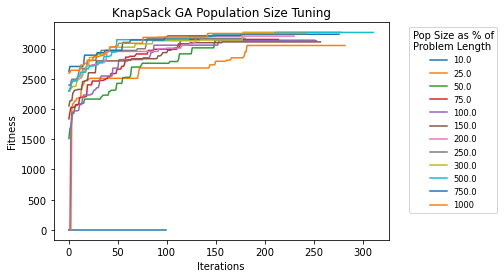

In [139]:
for i in range(len(ga_dict1['curve'])):
    y = ga_dict1['curve'][i]
    label = ga_dict1['pop_size'][i]

    plt.plot(y, label=label)

plt.title("KnapSack GA Population Size Tuning")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
plt.legend(title='Pop Size as % of\nProblem Length ', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
plt.show()

mutation_prob

In [92]:
mutation_prob_list = np.arange(0.1, 1, 0.1) 

for num in mutation_prob_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem4, 
                                                  pop_size = 10*problem4.length, mutation_prob = num,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42)

    print("mutation_prob:", num, "best_fitness:", best_fitness)

mutation_prob: 0.1 best_fitness: 3003.0
mutation_prob: 0.2 best_fitness: 2839.0
mutation_prob: 0.30000000000000004 best_fitness: 2865.0
mutation_prob: 0.4 best_fitness: 2835.0
mutation_prob: 0.5 best_fitness: 2677.0
mutation_prob: 0.6 best_fitness: 2644.0
mutation_prob: 0.7000000000000001 best_fitness: 2664.0
mutation_prob: 0.8 best_fitness: 2767.0
mutation_prob: 0.9 best_fitness: 2842.0


In [133]:
mutation_prob_list = np.arange(0.05, .16, 0.01) 

for num in mutation_prob_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem4, 
                                                  pop_size = 10*problem4.length, mutation_prob = num,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42)

    print("mutation_prob:", num, "best_fitness:", best_fitness)

mutation_prob: 0.05 best_fitness: 3058.0
mutation_prob: 0.060000000000000005 best_fitness: 2996.0
mutation_prob: 0.07 best_fitness: 2987.0
mutation_prob: 0.08000000000000002 best_fitness: 2955.0
mutation_prob: 0.09000000000000001 best_fitness: 2989.0
mutation_prob: 0.1 best_fitness: 3003.0
mutation_prob: 0.11000000000000001 best_fitness: 2843.0
mutation_prob: 0.12000000000000001 best_fitness: 2904.0
mutation_prob: 0.13 best_fitness: 2820.0
mutation_prob: 0.14 best_fitness: 2894.0
mutation_prob: 0.15000000000000002 best_fitness: 2996.0


In [134]:
mutation_prob_list = np.arange(0.01, .06, 0.01) 

for num in mutation_prob_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem4, 
                                                  pop_size = 10*problem4.length, mutation_prob = num,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42)

    print("mutation_prob:", num, "best_fitness:", best_fitness)

mutation_prob: 0.01 best_fitness: 3249.0
mutation_prob: 0.02 best_fitness: 3148.0
mutation_prob: 0.03 best_fitness: 3037.0
mutation_prob: 0.04 best_fitness: 3088.0
mutation_prob: 0.05 best_fitness: 3058.0


In [101]:
mutation_prob_list = np.arange(0.1, 1, 0.1) 

ga_dict2 = {
    'mutation_prob': [],
    'best_fitness':[],
    'curve':[]
}
for num in mutation_prob_list:
    
    best_state, best_fitness,curve = mlrose.genetic_alg(problem=problem4, 
                                                  pop_size = 10*problem4.length, mutation_prob = num,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42,curve=True)

    print("mutation_prob:", num, " best_fitness:", best_fitness)
    ga_dict2['mutation_prob'].append(num)
    ga_dict2['best_fitness'].append(best_fitness)
    ga_dict2['curve'].append(curve)
    


mutation_prob: 0.1  best_fitness: 3003.0
mutation_prob: 0.2  best_fitness: 2839.0
mutation_prob: 0.30000000000000004  best_fitness: 2865.0
mutation_prob: 0.4  best_fitness: 2835.0
mutation_prob: 0.5  best_fitness: 2677.0
mutation_prob: 0.6  best_fitness: 2644.0
mutation_prob: 0.7000000000000001  best_fitness: 2664.0
mutation_prob: 0.8  best_fitness: 2767.0
mutation_prob: 0.9  best_fitness: 2842.0


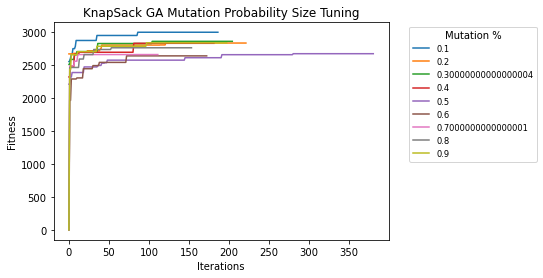

In [102]:
for i in range(len(ga_dict2['curve'])):
    y = ga_dict2['curve'][i]
    label = ga_dict2['mutation_prob'][i]

    plt.plot(y, label=label)

plt.title("KnapSack GA Mutation Probability Size Tuning")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
plt.legend(title='Mutation %', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
plt.show()

In [135]:
mutation_prob_list = np.arange(0.01, 0.16, 0.01) 

ga_dict3 = {
    'mutation_prob': [],
    'best_fitness':[],
    'curve':[]
}
for num in mutation_prob_list:
    
    best_state, best_fitness,curve = mlrose.genetic_alg(problem=problem4, 
                                                  pop_size = 10*problem4.length, mutation_prob = num,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42,curve=True)

    print("mutation_prob:", num, " best_fitness:", best_fitness)
    ga_dict3['mutation_prob'].append(num)
    ga_dict3['best_fitness'].append(best_fitness)
    ga_dict3['curve'].append(curve)
    


mutation_prob: 0.01  best_fitness: 3249.0
mutation_prob: 0.02  best_fitness: 3148.0
mutation_prob: 0.03  best_fitness: 3037.0
mutation_prob: 0.04  best_fitness: 3088.0
mutation_prob: 0.05  best_fitness: 3058.0
mutation_prob: 0.060000000000000005  best_fitness: 2996.0
mutation_prob: 0.06999999999999999  best_fitness: 2987.0
mutation_prob: 0.08  best_fitness: 2955.0
mutation_prob: 0.09  best_fitness: 2989.0
mutation_prob: 0.09999999999999999  best_fitness: 3003.0
mutation_prob: 0.11  best_fitness: 2843.0
mutation_prob: 0.12  best_fitness: 2904.0
mutation_prob: 0.13  best_fitness: 2820.0
mutation_prob: 0.14  best_fitness: 2894.0
mutation_prob: 0.15000000000000002  best_fitness: 2996.0


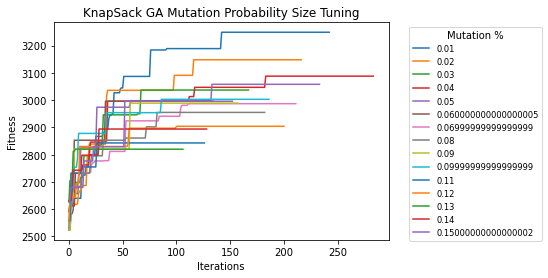

In [137]:
for i in range(len(ga_dict3['curve'])):
    y = ga_dict3['curve'][i]
    label = ga_dict3['mutation_prob'][i]

    plt.plot(y, label=label)

plt.title("KnapSack GA Mutation Probability Size Tuning")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
plt.legend(title='Mutation %', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
plt.show()

max_iters

In [84]:
max_iters_list = [10, 100, 1000, 10000, 100000]

for num in max_iters_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem4, 
                                                  pop_size = 5*problem4.length, mutation_prob = 0.1,
                                                   max_attempts = 10, max_iters = num,
                                                        random_state = 42)

    print("max_iters:",num ," best_fitness:", best_fitness)


max_iters: 10  best_fitness: 2707.0
max_iters: 100  best_fitness: 2824.0
max_iters: 1000  best_fitness: 2824.0
max_iters: 10000  best_fitness: 2824.0
max_iters: 100000  best_fitness: 2824.0


max_attempts

In [85]:
max_attempts_list = [10, 100, 1000, 10000, 100000]

for num in max_attempts_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem4, 
                                                  pop_size = 5*problem4.length, mutation_prob = 0.1,
                                                   max_attempts = num, max_iters = 1000,
                                                    random_state = 42)

    print("max_attempts",num ," best_fitness:", best_fitness)


max_attempts 10  best_fitness: 2824.0
max_attempts 100  best_fitness: 2969.0
max_attempts 1000  best_fitness: 2969.0
max_attempts 10000  best_fitness: 2969.0
max_attempts 100000  best_fitness: 2969.0


##### Mimic 

keep_pct

In [86]:
keep_pct_list = np.arange(0.1, 1, 0.1) 

for num in keep_pct_list:
    best_state, best_fitness = mlrose.mimic(problem=problem4, 
                                                  pop_size = 200, keep_pct = num,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)

    print("keep_pct:", num," best_fitness:",best_fitness)

keep_pct: 0.1  best_fitness: 2289.0
keep_pct: 0.2  best_fitness: 2289.0
keep_pct: 0.30000000000000004  best_fitness: 2289.0
keep_pct: 0.4  best_fitness: 2289.0
keep_pct: 0.5  best_fitness: 2289.0
keep_pct: 0.6  best_fitness: 2289.0
keep_pct: 0.7000000000000001  best_fitness: 2289.0
keep_pct: 0.8  best_fitness: 2289.0
keep_pct: 0.9  best_fitness: 2289.0


In [141]:
keep_pct_list = np.arange(0.1, 1, 0.1) 

for num in keep_pct_list:
    best_state, best_fitness = mlrose.mimic(problem=problem4, 
                                                  pop_size = 1*problem4.length, keep_pct = num,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)

    print("keep_pct:", num," best_fitness:",best_fitness)

keep_pct: 0.1  best_fitness: 2623.0
keep_pct: 0.2  best_fitness: 2623.0
keep_pct: 0.30000000000000004  best_fitness: 2623.0
keep_pct: 0.4  best_fitness: 2623.0
keep_pct: 0.5  best_fitness: 2623.0
keep_pct: 0.6  best_fitness: 2623.0
keep_pct: 0.7000000000000001  best_fitness: 2623.0
keep_pct: 0.8  best_fitness: 2623.0
keep_pct: 0.9  best_fitness: 2623.0


pop_size

In [87]:
pop_size_list = [.10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0]
problem_length = problem4.length


for num in pop_size_list:
    size =  num * problem_length
    
    best_state, best_fitness = mlrose.mimic(problem=problem4, 
                                                  pop_size = int(size), keep_pct = 0.20,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)


    print("pop_size:", size, " best_fitness:",best_fitness)

pop_size: 10.0  best_fitness: 0.0
pop_size: 25.0  best_fitness: 0.0
pop_size: 50.0  best_fitness: 1847.0
pop_size: 75.0  best_fitness: 2365.0
pop_size: 100.0  best_fitness: 2623.0
pop_size: 150.0  best_fitness: 2439.0
pop_size: 200.0  best_fitness: 2289.0
pop_size: 250.0  best_fitness: 2581.0
pop_size: 300.0  best_fitness: 2319.0
pop_size: 500.0  best_fitness: 2497.0


In [94]:
pop_size_list = [7.5, 10]
problem_length = problem4.length


for num in pop_size_list:
    size =  num * problem_length
    
    best_state, best_fitness = mlrose.mimic(problem=problem4, 
                                                  pop_size = int(size), keep_pct = 0.20,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)


    print("pop_size:", size, " best_fitness:",best_fitness)

pop_size: 750.0  best_fitness: 2475.0
pop_size: 1000  best_fitness: 2327.0


max_iters

In [66]:
#max_iters_list = [10, 100, 1000, 10000, 100000]
max_iters_list = [10, 100, 1000, 10000]


for num in max_iters_list:
    
    best_state, best_fitness = mlrose.mimic(problem=problem4, 
                                              pop_size = problem4.length*5, keep_pct = 0.20,
                                               max_attempts = 10, max_iters = int(num),
                                                    random_state = 42)


    print("max_iters:", num, " best_fitness:",best_fitness)


max_iters: 10  best_fitness: 56.0
max_iters: 100  best_fitness: 56.0
max_iters: 1000  best_fitness: 56.0
max_iters: 10000  best_fitness: 56.0


max_attempts

In [67]:
#max_attempts_list = [10, 100, 1000, 10000, 100000]
max_attempts_list = [10, 100, 1000, 10000]


for num in max_attempts_list:
    
    best_state, best_fitness = mlrose.mimic(problem=problem4, 
                                              pop_size = problem4.length*5, keep_pct = 0.20,
                                               max_attempts = int(num), max_iters = 1000,
                                                    random_state = 42)


    print("max_attempts:", num, " best_fitness:",best_fitness)
    

max_attempts: 10  best_fitness: 56.0
max_attempts: 100  best_fitness: 59.0
max_attempts: 1000  best_fitness: 62.0
max_attempts: 10000  best_fitness: 62.0
